# SciPy - Library of scientific algorithms for Python

J.R. Johansson (jrjohansson at gmail.com)

The latest version of this [Jupyter notebook](https://jupyter.org/#about-notebook) lecture is available at [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

The other notebooks in this lecture series are indexed at [http://jrjohansson.github.io](http://jrjohansson.github.io).

In [1]:
# what is this line all about? Answer in lecture 4
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

## Introduction

The SciPy framework builds on top of the low-level NumPy framework for multidimensional arrays, and provides a large number of higher-level scientific algorithms. Some of the topics that SciPy covers are:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

Each of these submodules provides a number of functions and classes that can be used to solve problems in their respective topics.

In this lecture we will look at how to use some of these subpackages.

When we want to use part of the SciPy framework we can selectively include only those modules we are interested in. For example, to include the linear algebra package under the name `la`, we can do:

In [2]:
import scipy.linalg as la

We'll be using some functions from numpy (from lecture 2) so we will import that also.

In [3]:
import numpy as np

## Special functions

A large number of mathematical special functions are important for many computional physics problems. SciPy provides implementations of a very extensive set of special functions. For details, see the list of functions in the reference documention at http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special. 

To demonstrate the typical usage of special functions we will look in more detail at the Bessel functions:

In [4]:
# The scipy.special module includes a large number of Bessel-functions
# Here we will use the functions jn and yn, which are the Bessel functions 
# of the first and second kind and real-valued order. We also include the 
# function jn_zeros and yn_zeros that gives the zeroes of the functions jn
# and yn.

from scipy.special import jn, yn, jn_zeros, yn_zeros

In [5]:
n = 0    # order
x = 0.0

# Bessel function of first kind
print(f"J_{n}({x}) = {jn(n, x)}")

x = 1.0
# Bessel function of second kind
print(f"Y_{n}({x}) = {yn(n, x)}")

J_0(0.0) = 1.0
Y_0(1.0) = 0.08825696421567697


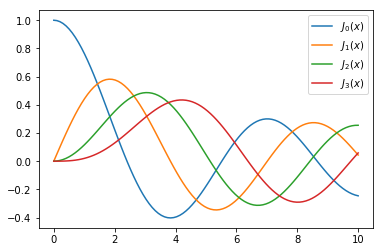

In [6]:
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
ax.legend();

In [7]:
# zeros of Bessel functions
n = 0 # order
m = 4 # number of roots to compute
jn_zeros(n, m)

array([  2.40482556,   5.52007811,   8.65372791,  11.79153444])

## Integration

### Numerical integration: quadrature

Numerical evaluation of a function of the type

$\displaystyle \int_a^b f(x) dx$

is called *numerical quadrature*, or simply *quadature*. SciPy provides a series of functions for different kind of quadrature, for example the `quad`, `dblquad` and `tplquad` for single, double and triple integrals, respectively.



In [8]:
from scipy.integrate import quad, dblquad, tplquad

The `quad` function takes a large number of optional arguments, which can be used to fine-tune the behaviour of the function (try `help(quad)` for details).

The basic usage is as follows:

In [9]:
# define a simple function for the integrand
def f(x):
    return x

In [10]:
x_lower = 0 # the lower limit of x
x_upper = 1 # the upper limit of x

val, abserr = quad(f, x_lower, x_upper)

print(f"integral value = {val}, absolute error = {abserr}")

integral value = 0.5, absolute error = 5.551115123125783e-15


If we need to pass extra arguments to integrand function we can use the `args` keyword argument:

In [11]:
def integrand(x, n):
    """
    Bessel function of first kind and order n. 
    """
    return jn(n, x)


x_lower = 0  # the lower limit of x
x_upper = 10 # the upper limit of x

val, abserr = quad(integrand, x_lower, x_upper, args=(3,))

print(f"{val}, {abserr}")

0.7366751370811073, 9.389126882496403e-13


For simple functions we can use a lambda function (name-less function) instead of explicitly defining a function for the integrand:

In [12]:
val, abserr = quad(lambda x: np.exp(-x ** 2), -np.Inf, np.Inf)

print(f"numerical  = {val}, {abserr}")

analytical = np.sqrt(np.pi)
print(f"analytical = {analytical}")

numerical  = 1.7724538509055159, 1.4202636780944923e-08
analytical = 1.7724538509055159


As show in the example above, we can also use 'Inf' or '-Inf' as integral limits.

Higher-dimensional integration works in the same way:

In [13]:
def integrand(x, y):
    return np.exp(-x**2-y**2)

x_lower = 0  
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)

print(f"{val}, {abserr}")

0.7853981633974476, 1.3753098510218528e-08


Note how we had to pass lambda functions for the limits for the y integration, since these in general can be functions of x.

## Ordinary differential equations (ODEs)

SciPy provides two different ways to solve ODEs: An API based on the function `odeint`, and object-oriented API based on the class `ode`. Usually `odeint` is easier to get started with, but the `ode` class offers some finer level of control.

Here we will use the `odeint` functions. For more information about the class `ode`, try `help(ode)`. It does pretty much the same thing as `odeint`, but in an object-oriented fashion.

To use `odeint`, first import it from the `scipy.integrate` module

In [14]:
from scipy.integrate import odeint, ode

A system of ODEs are usually formulated on standard form before it is attacked numerically. The standard form is:

$y' = f(y, t)$

where 

$y = [y_1(t), y_2(t), ..., y_n(t)]$ 

and $f$ is some function that gives the derivatives of the function $y_i(t)$. To solve an ODE we need to know the function $f$ and an initial condition, $y(0)$.

Note that higher-order ODEs can always be written in this form by introducing new variables for the intermediate derivatives.

Once we have defined the Python function `f` and array `y_0` (that is $f$ and $y(0)$ in the mathematical formulation), we can use the `odeint` function as:

    y_t = odeint(f, y_0, t)

where `t` is and array with time-coordinates for which to solve the ODE problem. `y_t` is an array with one row for each point in time in `t`, where each column corresponds to a solution `y_i(t)` at that point in time. 

We will see how we can implement `f` and `y_0` in Python code in the examples below.

#### Example: double pendulum

Let's consider a physical example: The double compound pendulum, described in some detail here: http://en.wikipedia.org/wiki/Double_pendulum

In [15]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/c/c9/Double-compound-pendulum-dimensioned.svg')

The equations of motion of the pendulum are given on the wiki page:

${\dot \theta_1} = \frac{6}{m\ell^2} \frac{ 2 p_{\theta_1} - 3 \cos(\theta_1-\theta_2) p_{\theta_2}}{16 - 9 \cos^2(\theta_1-\theta_2)}$

${\dot \theta_2} = \frac{6}{m\ell^2} \frac{ 8 p_{\theta_2} - 3 \cos(\theta_1-\theta_2) p_{\theta_1}}{16 - 9 \cos^2(\theta_1-\theta_2)}.$

${\dot p_{\theta_1}} = -\frac{1}{2} m \ell^2 \left [ {\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) + 3 \frac{g}{\ell} \sin \theta_1 \right ]$

${\dot p_{\theta_2}} = -\frac{1}{2} m \ell^2 \left [ -{\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) +  \frac{g}{\ell} \sin \theta_2 \right]$

To make the Python code simpler to follow, let's introduce new variable names and the vector notation: $x = [\theta_1, \theta_2, p_{\theta_1}, p_{\theta_2}]$

${\dot x_1} = \frac{6}{m\ell^2} \frac{ 2 x_3 - 3 \cos(x_1-x_2) x_4}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_2} = \frac{6}{m\ell^2} \frac{ 8 x_4 - 3 \cos(x_1-x_2) x_3}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_3} = -\frac{1}{2} m \ell^2 \left [ {\dot x_1} {\dot x_2} \sin (x_1-x_2) + 3 \frac{g}{\ell} \sin x_1 \right ]$

${\dot x_4} = -\frac{1}{2} m \ell^2 \left [ -{\dot x_1} {\dot x_2} \sin (x_1-x_2) +  \frac{g}{\ell} \sin x_2 \right]$

In [16]:
g = 9.82
L = 0.5
m = 0.1

def dx(x, t):
    """
    The right-hand side of the pendulum ODE
    """
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * np.cos(x1-x2) * x4)/(16 - 9 * np.cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * np.cos(x1-x2) * x3)/(16 - 9 * np.cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * np.sin(x1-x2) + 3 * (g/L) * np.sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * np.sin(x1-x2) + (g/L) * np.sin(x2))
    
    return [dx1, dx2, dx3, dx4]

In [17]:
# choose an initial state
x0 = [np.pi/4, np.pi/2, 0, 0]

In [18]:
# time coodinate to solve the ODE for: from 0 to 10 seconds
t = np.linspace(0, 10, 501)

In [19]:
# solve the ODE problem
x_pendulum = odeint(dx, x0, t)

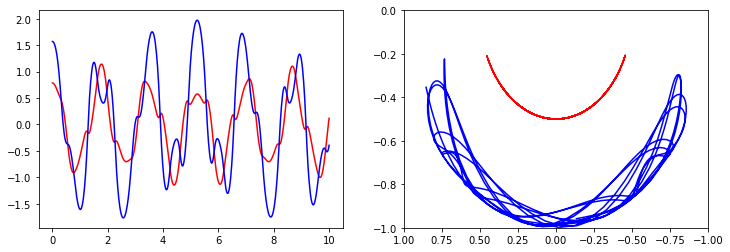

In [20]:
# plot the angles as a function of time

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].plot(t, x_pendulum[:, 0], 'r', label="theta1")
axes[0].plot(t, x_pendulum[:, 1], 'b', label="theta2")


x1 = + L * np.sin(x_pendulum[:, 0])
y1 = - L * np.cos(x_pendulum[:, 0])

x2 = x1 + L * np.sin(x_pendulum[:, 1])
y2 = y1 - L * np.cos(x_pendulum[:, 1])
    
axes[1].plot(x1, y1, 'r', label="pendulum1")
axes[1].plot(x2, y2, 'b', label="pendulum2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1]);

A quick animation of the pendulum motion can be made using the `interact` function within `ipywidgets`. More details on `ipywidgets` and `interact` can be found at https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html.

Drag the slider to see the pendulum move.

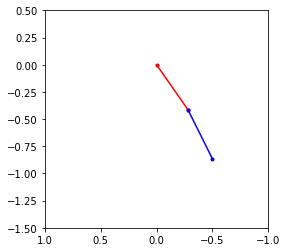

In [21]:
from ipywidgets import interact

def display_double_pendulum(t_idx=0):
    fig, ax = plt.subplots(figsize=(4,4))
    x1 = +L * np.sin(x_pendulum[t_idx, 0])
    y1 = -L * np.cos(x_pendulum[t_idx, 0])

    x2 = x1 + L * np.sin(x_pendulum[t_idx, 1])
    y2 = y1 - L * np.cos(x_pendulum[t_idx, 1])

    ax.cla()    
    ax.plot([0, x1], [0, y1], 'r.-')
    ax.plot([x1, x2], [y1, y2], 'b.-')
    ax.set_ylim([-1.5, 0.5])
    ax.set_xlim([1, -1])

interact(display_double_pendulum, t_idx=(0, 500))

#### Example: Damped harmonic oscillator

ODE problems are important in computational physics, so we will look at one more example: the damped harmonic oscillation. This problem is well described on the wiki page: http://en.wikipedia.org/wiki/Damping

The equation of motion for the damped oscillator is:

$\displaystyle \frac{\mathrm{d}^2x}{\mathrm{d}t^2} + 2\zeta\omega_0\frac{\mathrm{d}x}{\mathrm{d}t} + \omega^2_0 x = 0$

where $x$ is the position of the oscillator, $\omega_0$ is the frequency, and $\zeta$ is the damping ratio. To write this second-order ODE on standard form we introduce $p = \frac{\mathrm{d}x}{\mathrm{d}t}$:

$\displaystyle \frac{\mathrm{d}p}{\mathrm{d}t} = - 2\zeta\omega_0 p - \omega^2_0 x$

$\displaystyle \frac{\mathrm{d}x}{\mathrm{d}t} = p$

In the implementation of this example we will add extra arguments to the RHS function for the ODE, rather than using global variables as we did in the previous example. As a consequence of the extra arguments to the RHS, we need to pass an keyword argument `args` to the `odeint` function:

In [22]:
def dy(y, t, zeta, w0):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]

In [23]:
# initial state: 
y0 = [1.0, 0.0]

In [24]:
# time coodinate to solve the ODE for
t = np.linspace(0, 10, 1000)
w0 = 2 * np.pi * 1.0

In [25]:
# solve the ODE problem for three different values of the damping ratio

y1 = odeint(dy, y0, t, args=(0.0, w0)) # undamped
y2 = odeint(dy, y0, t, args=(0.2, w0)) # under damped
y3 = odeint(dy, y0, t, args=(1.0, w0)) # critial damping
y4 = odeint(dy, y0, t, args=(5.0, w0)) # over damped

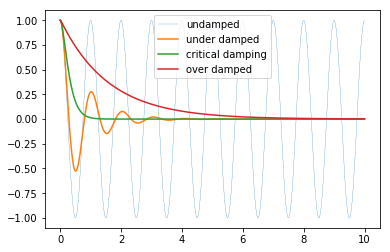

In [26]:
fig, ax = plt.subplots()
ax.plot(t, y1[:,0], label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], label="under damped")
ax.plot(t, y3[:,0], label=r"critical damping")
ax.plot(t, y4[:,0], label="over damped")
ax.legend();

## Fourier transform

Fourier transforms are one of the universal tools in computational physics, which appear over and over again in different contexts. SciPy provides functions for accessing the classic [FFTPACK](http://www.netlib.org/fftpack/) library from NetLib, which is an efficient and well tested FFT library written in FORTRAN. The SciPy API has a few additional convenience functions, but overall the API is closely related to the original FORTRAN library.

To use the `fftpack` module in a python program, include it using:

In [27]:
from scipy import fftpack

To demonstrate how to do a fast Fourier transform with SciPy, let's look at the FFT of the solution to the damped oscillator from the previous section:

In [28]:
N = len(t)
dt = t[1]-t[0]

# calculate the fast fourier transform
# y2 is the solution to the under-damped oscillator from the previous section
F = fftpack.fft(y2[:,0]) 

# calculate the frequencies for the components in F
w = np.fft.fftfreq(N, dt)

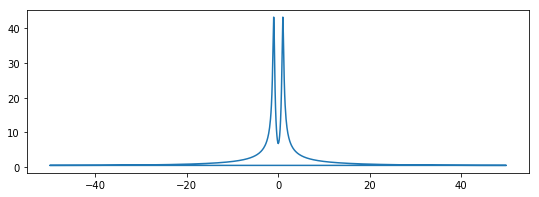

In [29]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w, abs(F));

Since the signal is real, the spectrum is symmetric. We therefore only need to plot the part that corresponds to the postive frequencies. To extract that part of the `w` and `F` we can use some of the indexing tricks for NumPy arrays that we saw in Lecture 2:

In [30]:
indices = np.where(w > 0) # select only indices for elements that corresponds to positive frequencies
w_pos = w[indices]
F_pos = F[indices]

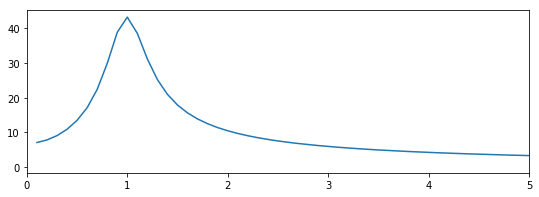

In [31]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w_pos, abs(F_pos))
ax.set_xlim(0, 5);

As expected, we now see a peak in the spectrum that is centered around 1, which is the frequency we used in the damped oscillator example.

## Linear algebra

The linear algebra module contains a lot of matrix related functions, including linear equation solving, eigenvalue solvers, matrix functions (for example matrix-exponentiation), a number of different decompositions (SVD, LU, cholesky), etc. 

Detailed documetation is available at: http://docs.scipy.org/doc/scipy/reference/linalg.html

Here we will look at how to use some of these functions:



### Linear equation systems

Linear equation systems on the matrix form

$A x = b$

where $A$ is a matrix and $x,b$ are vectors can be solved like:

In [32]:
from scipy import linalg

In [33]:
A = np.array([[1,2,5], [4,5,6], [7,8,9]])
b = np.array([1,2,3])

In [34]:
x = linalg.solve(A, b)

x

array([ -3.33333333e-01,   6.66666667e-01,   1.58603289e-17])

In [35]:
# check
np.dot(A, x) - b

array([ -1.11022302e-16,   0.00000000e+00,   0.00000000e+00])

We can also do the same with

$A X = B$

where $A, B, X$ are matrices:

In [36]:
A = np.random.rand(3,3)
B = np.random.rand(3,3)

In [37]:
X = linalg.solve(A, B)

In [38]:
X

array([[ 1.25913554,  0.63858781,  0.45842281],
       [-1.05466868,  0.35407611, -0.00341443],
       [ 0.82869863,  0.2369371 , -0.04374536]])

In [39]:
# check
linalg.norm(np.dot(A, X) - B)

2.0218274671598237e-16

### Eigenvalues and eigenvectors

The eigenvalue problem for a matrix $A$:

$\displaystyle A v_n = \lambda_n v_n$

where $v_n$ is the $n$th eigenvector and $\lambda_n$ is the $n$th eigenvalue.

To calculate eigenvalues of a matrix, use the `eigvals` and for calculating both eigenvalues and eigenvectors, use the function `eig`:

In [40]:
evals = linalg.eigvals(A)

In [41]:
evals

array([ 1.66185479+0.j, -0.50773305+0.j,  0.24812327+0.j])

In [42]:
evals, evecs = linalg.eig(A)

In [43]:
evals

array([ 1.66185479+0.j, -0.50773305+0.j,  0.24812327+0.j])

In [44]:
evecs

array([[-0.40890288, -0.75208724,  0.54701879],
       [-0.77023807,  0.01466619, -0.77769711],
       [-0.48941981,  0.65890036,  0.3097703 ]])

The eigenvectors corresponding to the $n$th eigenvalue (stored in `evals[n]`) is the $n$th *column* in `evecs`, i.e., `evecs[:,n]`. To verify this, let's try mutiplying eigenvectors with the matrix and compare to the product of the eigenvector and the eigenvalue:

In [45]:
n = 1

linalg.norm(np.dot(A, evecs[:,n]) - evals[n] * evecs[:,n])

3.005630573671917e-16

There are also more specialized eigensolvers, like the `eigh` for Hermitian matrices. 

### Matrix operations

In [46]:
# the matrix inverse
linalg.inv(A)

array([[ 0.32922348, -1.54441543,  2.65824799],
       [-1.37855245,  2.39514782, -1.67066997],
       [ 1.66227303, -0.46076945, -0.06191804]])

In [47]:
# determinant
linalg.det(A)

-0.20936110292785043

In [48]:
# norms of various orders
linalg.norm(A, ord=2), linalg.norm(A, ord=np.Inf)

(1.6940444529662466, 2.1807253938066724)

### Sparse matrices

Sparse matrices are often useful in numerical simulations dealing with large systems, if the problem can be described in matrix form where the matrices or vectors mostly contains zeros. Scipy has a good support for sparse matrices, with basic linear algebra operations (such as equation solving, eigenvalue calculations, etc).

There are many possible strategies for storing sparse matrices in an efficient way. Some of the most common are the so-called coordinate form (COO), list of list (LIL) form,  and compressed-sparse column CSC (and row, CSR). Each format has some advantanges and disadvantages. Most computational algorithms (equation solving, matrix-matrix multiplication, etc) can be efficiently implemented using CSR or CSC formats, but they are not so intuitive and not so easy to initialize. So often a sparse matrix is initially created in COO or LIL format (where we can efficiently add elements to the sparse matrix data), and then converted to CSC or CSR before used in real calcalations.

For more information about these sparse formats, see e.g. http://en.wikipedia.org/wiki/Sparse_matrix

When we create a sparse matrix we have to choose which format it should be stored in. For example, 

In [49]:
from scipy import sparse

In [50]:
# dense matrix
M = np.array([[1,0,0,0], [0,3,0,0], [0,1,1,0], [1,0,0,1]]); M

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

In [51]:
# convert from dense to sparse
A = sparse.csr_matrix(M); A

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [52]:
# convert from sparse to dense
A.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]], dtype=int64)

More efficient way to create sparse matrices: create an empty matrix and populate with using matrix indexing (avoids creating a potentially large dense matrix)

In [53]:
A = sparse.lil_matrix((4,4)) # empty 4x4 sparse matrix
A[0,0] = 1
A[1,1] = 3
A[2,2] = A[2,1] = 1
A[3,3] = A[3,0] = 1
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in LInked List format>

In [54]:
A.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]])

Converting between different sparse matrix formats:

In [55]:
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in LInked List format>

In [56]:
A = sparse.csr_matrix(A); A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [57]:
A = sparse.csc_matrix(A); A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Column format>

We can compute with sparse matrices like with dense matrices:

In [58]:
A.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]])

In [59]:
(A * A).todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  9.,  0.,  0.],
        [ 0.,  4.,  1.,  0.],
        [ 2.,  0.,  0.,  1.]])

In [60]:
A.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]])

In [61]:
A.dot(A).todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  9.,  0.,  0.],
        [ 0.,  4.,  1.,  0.],
        [ 2.,  0.,  0.,  1.]])

In [62]:
v = np.array([1,2,3,4])[:,np.newaxis]; v

array([[1],
       [2],
       [3],
       [4]])

In [63]:
# sparse matrix - dense vector multiplication
A * v

array([[ 1.],
       [ 6.],
       [ 5.],
       [ 5.]])

In [64]:
# same result with dense matrix - dense vector multiplcation
A.todense() * v

matrix([[ 1.],
        [ 6.],
        [ 5.],
        [ 5.]])

## Optimization

Optimization (finding minima or maxima of a function) is a large field in mathematics, and optimization of complicated functions or in many variables can be rather involved. Here we will only look at a few very simple cases. For a more detailed introduction to optimization with SciPy see: http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

To use the optimization module in scipy first include the `optimize` module:

In [65]:
from scipy import optimize

### Finding a minima

Let's first look at how to find the minima of a simple function of a single variable:

In [66]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

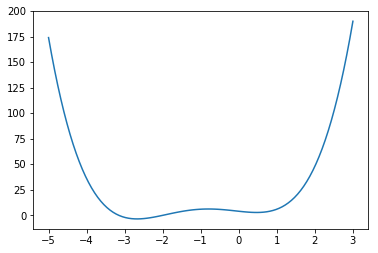

In [67]:
fig, ax  = plt.subplots()
x = np.linspace(-5, 3, 100)
ax.plot(x, f(x));

We can use the `fmin_bfgs` function to find the minima of a function:

In [68]:
x_min = optimize.fmin_bfgs(f, -2)
x_min 

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8


array([-2.67298151])

In [69]:
optimize.fmin_bfgs(f, 0.5) 

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 15
         Gradient evaluations: 5


array([ 0.46961745])

We can also use the `brent` or `fminbound` functions. They have a bit different syntax and use different algorithms. 

In [70]:
optimize.brent(f)

0.46961743402759754

In [71]:
optimize.fminbound(f, -4, 2)

-2.6729822917513886

### Finding a solution to a function

To find the root for a function of the form $f(x) = 0$ we can use the `fsolve` function. It requires an initial guess: 

In [72]:
omega_c = 3.0
def f(omega):
    # a transcendental equation: resonance frequencies of a low-Q SQUID terminated microwave resonator
    return np.tan(2*np.pi*omega) - omega_c/omega

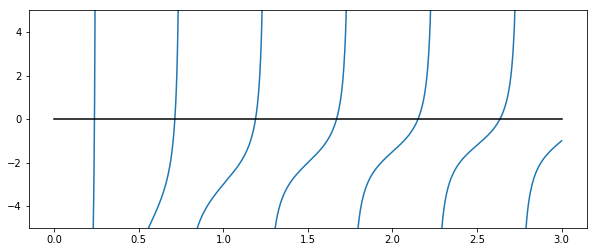

In [73]:
fig, ax  = plt.subplots(figsize=(10,4))
x = np.linspace(0.001, 3, 1000)
y = f(x)
mask = np.where(abs(y) > 50)
x[mask] = y[mask] = np.NaN # get rid of vertical line when the function flip sign
ax.plot(x, y)
ax.plot([0, 3], [0, 0], 'k')
ax.set_ylim(-5,5);

In [74]:
optimize.fsolve(f, 0.1)

array([ 0.23743014])

In [75]:
optimize.fsolve(f, 0.6)

array([ 0.71286972])

In [76]:
optimize.fsolve(f, 1.1)

array([ 1.18990285])

## Interpolation

Interpolation is simple and convenient in scipy: The `interp1d` function, when given arrays describing X and Y data, returns and object that behaves like a function that can be called for an arbitrary value of x (in the range covered by X), and it returns the corresponding interpolated y value:

In [77]:
from scipy import interpolate

In [78]:
def f(x):
    return np.sin(x)

In [79]:
n = np.arange(0, 10)  
x = np.linspace(0, 9, 100)

y_meas = f(n) + 0.1 * np.random.randn(len(n)) # simulate measurement with noise
y_real = f(x)

linear_interpolation = interpolate.interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interpolate.interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

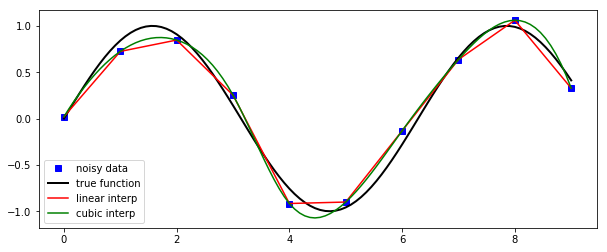

In [80]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.legend(loc=3);

## Statistics

The `scipy.stats` module contains a large number of statistical distributions, statistical functions and tests. For a complete documentation of its features, see http://docs.scipy.org/doc/scipy/reference/stats.html.

There is also a very powerful python package for statistical modelling called statsmodels. See http://statsmodels.sourceforge.net for more details.

In [81]:
from scipy import stats

In [82]:
# create a (discreet) random variable with poissionian distribution

X = stats.poisson(3.5) # photon distribution for a coherent state with n=3.5 photons

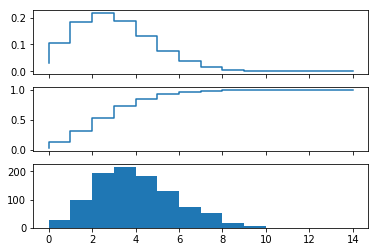

In [83]:
n = np.arange(0,15)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability mass function (PMF)
axes[0].step(n, X.pmf(n))

# plot the commulative distribution function (CDF)
axes[1].step(n, X.cdf(n))

# plot histogram of 1000 random realizations of the stochastic variable X
axes[2].hist(X.rvs(size=1000));

In [84]:
# create a (continous) random variable with normal distribution
Y = stats.norm()

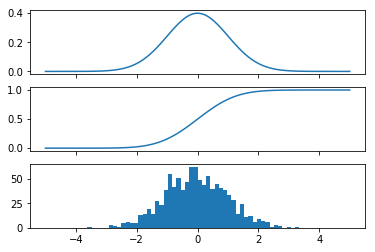

In [85]:
x = np.linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability distribution function (PDF)
axes[0].plot(x, Y.pdf(x))

# plot the commulative distributin function (CDF)
axes[1].plot(x, Y.cdf(x));

# plot histogram of 1000 random realizations of the stochastic variable Y
axes[2].hist(Y.rvs(size=1000), bins=50);

Statistics:

In [86]:
X.mean(), X.std(), X.var() # poission distribution

(3.5, 1.8708286933869707, 3.5)

In [87]:
Y.mean(), Y.std(), Y.var() # normal distribution

(0.0, 1.0, 1.0)

### Statistical tests

Test if two sets of (independent) random data comes from the same distribution:

In [88]:
t_statistic, p_value = stats.ttest_ind(X.rvs(size=1000), X.rvs(size=1000))

print(f"t-statistic = {t_statistic}")
print(f"p-value = {p_value}")

t-statistic = -0.2536836657323961
p-value = 0.799766055409135


Since the p value is very large we cannot reject the hypothesis that the two sets of random data have *different* means.

To test if the mean of a single sample of data has mean 0.1 (the true mean is 0.0):

In [89]:
stats.ttest_1samp(Y.rvs(size=1000), 0.1)

Ttest_1sampResult(statistic=-3.5623539847824546, pvalue=0.00038489422467669553)

Low p-value means that we can reject the hypothesis that the mean of Y is 0.1.

In [90]:
Y.mean()

0.0

In [91]:
stats.ttest_1samp(Y.rvs(size=1000), Y.mean())

Ttest_1sampResult(statistic=-0.53550940811324244, pvalue=0.59241684424743368)

## Further reading

* http://www.scipy.org - The official web page for the SciPy project.
* http://docs.scipy.org/doc/scipy/reference/tutorial/index.html - A tutorial on how to get started using SciPy. 
* https://github.com/scipy/scipy/ - The SciPy source code. 

## Versions

In [92]:
%reload_ext version_information

%version_information numpy, matplotlib, scipy

Software versions
Python 3.6.0 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 5.1.0
OS Linux 4.10.0 20 generic x86_64 with debian stretch sid
numpy 1.11.3
matplotlib 2.0.2
scipy 0.19.0
Wed May 17 21:57:30 2017 AEST